Handling missing data
---
- Missing data is a common issue in real-world datasets. Improper handling can bias results, reduce model performance, or lead to invalid conclusions. To deal with missing values, different strategies are applied depending on:
    - Type of variable: Numerical vs. Categorical
    - Nature of analysis: Univariate vs. Multivariate
    - Extent of missing values: Small, moderate, or large proportion

---
## Threshold based Removal Technique
  - Row Deletion (List-wise Deletion or Complete Case Analysis CCA)
    - If the percentage of missing data in a column/row is less than 5%, it is often safe to drop the rows but the missing data should be a random missing and not in a bulk/chunk at the same location.
    - Example: If 50 rows out of 1000 have missing values, removing them has little effect.
  - Column Removal
    - If a column has more than 70% missing values, it usually provides little information and drop the column may not affect the data.
    - Example: A survey question that very few participants answered.
    - Intermediate Case (40–70%)
    - For columns with 40–70% missing values, keep if the feature is important, and apply imputation.
    - Drop if the feature is not critical.
    - For Example, a clinical test result missing for half of the patients may still be crucial so then impute it.
---
## Univariate Imputation Techniques
- Univariate methods only look at the distribution of the column itself without considering relationships with other variables.
- ### For Numerical Columns:
    #### Mean Imputation
    - Replace missing values with the mean. When the data is distributed normally, then apply the mean to fill the missing values. Due to this process, the variance will be shrink at some extent. If the variance shrinking is at much high rate, then do not apply the mean as it will not be a good approach.
    - The disadvantage of the applying mean will be that it will change the distribution of the data.

   #### Median Imputation
    - Replace missing values with the median. Apply the median, when the data is a bit right skewed distributed. The process can be find out through the histogram or just by calculating the skewed value. If the value is at 0, then it is at mean, greater than 0 values determined right skewed and less than 0 will determined the data distribution is left skewed.
    - The disadvantage of apply the median is that it will change the distribution of the data and can create outliers as well.

- ### For Categorical Columns:
    #### Mode (Most Frequent) Imputation
    • Replace missing values with the most frequent category/mode.
    #### “Missing” Category Imputation
    • Replace missing values with a new category "Missing".


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = sns.load_dataset("titanic")
print("First Five Rows")
print(df.head())

First Five Rows
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [15]:
df.shape

(891, 15)

In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
df.isnull().sum() / len(df)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [18]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [21]:
# Confirmation check for the 20 cent data missing columns only
missing_percentage = df.isnull().sum() / len(df) * 100
columns = missing_percentage[(missing_percentage > 0) & (missing_percentage <= 20)].index.tolist()
print(columns)

['age', 'embarked', 'embark_town']


In [22]:
# What percent will be left if we drop the 20 cent of Age data
len(df[columns].dropna()) / len(df)

0.7991021324354658

In [24]:
new_df_age = df.dropna(subset=['age'])

In [25]:
df.shape, new_df_age.shape

((891, 15), (714, 15))

Text(0.5, 1.0, 'Before and After rows removal')

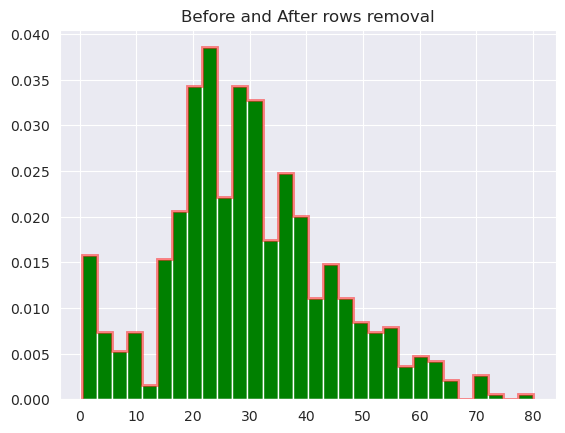

In [28]:
# Comparing Original and new data via histogram
df['age'].hist(bins=30, density=True, color='red', label='Before', alpha=0.5, histtype='step', linewidth=2)

new_df_age['age'].hist(bins=30, color='green', density=True, label='After')

plt.title("Before and After rows removal")

# TASK 1

- Implement the task performed above but the dataset should be of your own choice and not the one mentioned above.

In [82]:
dataset_path = "/home/faran/Downloads/retail/synthetic_dataset.csv"
df = pd.read_csv(dataset_path)
df.sample(5)

,Category,Price,Rating,Stock,Discount
1095,C,9566.0,NaN,Out of Stock,1.0
2042,B,9919.0,2.916351,NaN,4.0
2493,NaN,1907.0,NaN,NaN,16.0
557,NaN,7405.0,NaN,In Stock,31.0
3669,NaN,6445.0,NaN,In Stock,17.0


In [83]:
df.shape

(4362, 5)

In [84]:
df.isnull().sum()

Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64

In [85]:
df.isnull().sum() / len(df) * 100

Category    62.998624
Price        3.988996
Rating      46.996790
Stock       30.994956
Discount     8.986703
dtype: float64

In [86]:
missing_percentage = df.isnull().sum() / len(df) * 100
columns = missing_percentage[(missing_percentage > 0) & (missing_percentage <= 5)].index.tolist()
print(columns)

['Price']


In [87]:
len(df[columns].dropna()) / len(df)

0.9601100412654745

In [88]:
new_df_price = df.dropna(subset=['Price'])

In [89]:
df.shape,new_df_price.shape

((4362, 5), (4188, 5))

Text(0.5, 1.0, 'Before & After rows removal comparison')

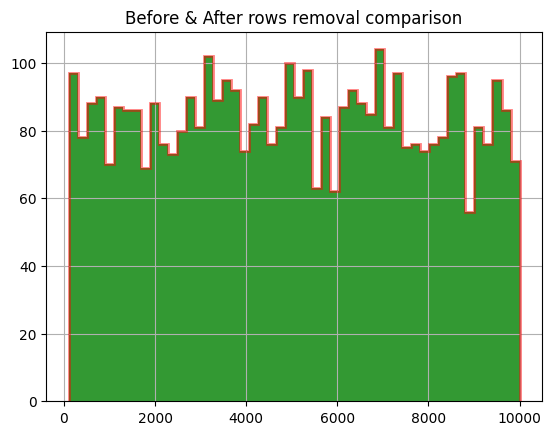

In [90]:
df['Price'].hist(bins=50, color='red', label='Before', alpha=0.5, histtype='step', linewidth=2)

new_df_price['Price'].hist(bins=50, color='green', label='After', alpha=0.8)

plt.title("Before & After rows removal comparison")

# TASK 2
- Identify any column of your dataset having missing numerical values more than 20 percent and compare the before and after removal of the rows.

In [77]:
missing_percentage = df.isnull().sum() / len(df) * 100
columns = missing_percentage[(missing_percentage > 20)].index.tolist()
print(columns)

['Category', 'Rating', 'Stock']


In [78]:
len(df[columns].dropna()) / len(df) * 100

14.259513984410821

In [91]:
new_df_stock = df.dropna(subset=['Rating'])

In [92]:
df.shape,new_df_stock.shape

((4362, 5), (2312, 5))

Text(0.5, 1.0, 'Before & After rows removal comparison')

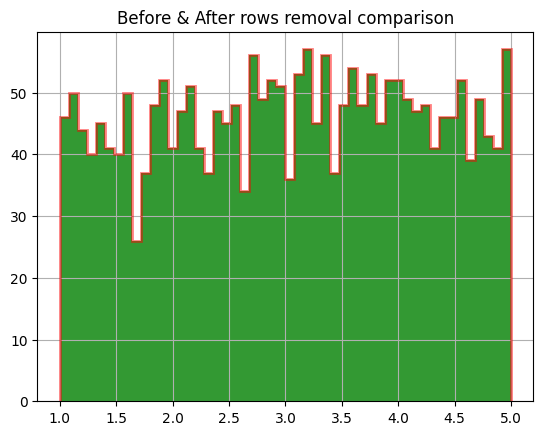

In [66]:
df['Rating'].hist(bins=50, color='red', label='Before', alpha=0.5, histtype='step', linewidth=2)

new_df_stock['Rating'].hist(bins=50, color='green', label='After', alpha=0.8)

plt.title("Before & After rows removal comparison")

# TASK 3
- While dealing with the categorical data for the removal technique of the missing rows, the ratio of before and after removing rows should be slightly changed. Apply the removal of the missing data on any categorical data of the downloaded dataset and present the result in terms of ratio.

In [46]:
print("Total rows before:", len(df))

before_counts = df['Category'].value_counts(dropna=False)
before_ratio = before_counts / len(df) * 100

print("\nCategory ratio before (including NaN, in %):")
print(before_ratio)

df_after = df.dropna(subset=['Category'])
print("\nTotal rows after:", len(df_after))

after_counts = df_after['Category'].value_counts()
after_ratio = after_counts / len(df_after) * 100

print("\nCategory ratio after (in %):")
print(after_ratio)

comparison = pd.concat([before_ratio.dropna(), after_ratio], axis=1, keys=['Before %', 'After %'])
comparison['Change %'] = comparison['After %'] - comparison['Before %']

print("\nComparison of ratios:")
print(comparison)


Total rows before: 4362

Category ratio before (including NaN, in %):
Category
NaN    62.998624
C       9.743237
D       9.353508
A       9.238881
B       8.665750
Name: count, dtype: float64

Total rows after: 1614

Category ratio after (in %):
Category
C    26.332094
D    25.278810
A    24.969021
B    23.420074
Name: count, dtype: float64

Comparison of ratios:
           Before %    After %   Change %
Category                                 
NaN       62.998624        NaN        NaN
C          9.743237  26.332094  16.588857
D          9.353508  25.278810  15.925303
A          9.238881  24.969021  15.730140
B          8.665750  23.420074  14.754325


# TASK 4
- One of the technique for imputing/filling the numerical univariate is to impute them with the Mean of the column. When the data is normal distributed, the imputation with the mean is the best approach, however, the variance will be shrink with the mean imputation. Apply this approach on numerical column and compare the variance before and after applying mean.

In [47]:
print("Missing values in Discount:", df['Discount'].isnull().sum())

before_var = df['Discount'].var()
print("Variance before imputation:", before_var)

mean_val = df['Discount'].mean()
df_mean_imputed = df.copy()
df_mean_imputed['Discount'] = df_mean_imputed['Discount'].fillna(mean_val)

after_var = df_mean_imputed['Discount'].var()
print("Variance after mean imputation:", after_var)

print("\nComparison:")
print(f"Before variance: {before_var:.4f}")
print(f"After variance : {after_var:.4f}")
print(f"Shrinkage      : {before_var - after_var:.4f}")


Missing values in Discount: 392
Variance before imputation: 205.84111936779564
Variance after mean imputation: 187.33854684035336

Comparison:
Before variance: 205.8411
After variance : 187.3385
Shrinkage      : 18.5026


# TASK 5
- To impute the categorical data in a univariate analysis, the two approaches are to impute the missing value with the most frequent (mode) or any other word such as “Missing”. During the model training, the model will observe the “Missing” word and will not affect the training. Implement the code where both the approaches being achieved and display the comparison as well.

In [48]:
print("Missing values in Stock (before):", df['Stock'].isnull().sum())

mode_val = df['Stock'].mode()[0]
df_mode_imputed = df.copy()
df_mode_imputed['Stock'] = df_mode_imputed['Stock'].fillna(mode_val)

df_missing_imputed = df.copy()
df_missing_imputed['Stock'] = df_missing_imputed['Stock'].fillna("Missing")

print("\nDistribution after Mode Imputation:")
print(df_mode_imputed['Stock'].value_counts(normalize=True) * 100)

print("\nDistribution after 'Missing' Imputation:")
print(df_missing_imputed['Stock'].value_counts(normalize=True) * 100)

comparison = pd.DataFrame({
    "Original (with NaN)": df['Stock'].value_counts(dropna=False),
    "Mode Imputation": df_mode_imputed['Stock'].value_counts(),
    "'Missing' Imputation": df_missing_imputed['Stock'].value_counts()
})

print("\nComparison Table:")
print(comparison)

Missing values in Stock (before): 1352

Distribution after Mode Imputation:
Stock
In Stock        65.68088
Out of Stock    34.31912
Name: proportion, dtype: float64

Distribution after 'Missing' Imputation:
Stock
In Stock        34.685924
Out of Stock    34.319120
Missing         30.994956
Name: proportion, dtype: float64

Comparison Table:
              Original (with NaN)  Mode Imputation  'Missing' Imputation
Stock                                                                   
In Stock                   1513.0           2865.0                1513.0
Missing                       NaN              NaN                1352.0
Out of Stock               1497.0           1497.0                1497.0
NaN                        1352.0              NaN                   NaN
